## Understanding Relationship of Card Count Per User and Annual Income

First, I want to have an overview of annual income across all users (see Box Plot) and check outliers. <br>
Second, I want to find out where the high income users (Top 25% Income) are concentrated (see Pie Chart). <br><br>In order to visualize the relationship between card count and annual income (see Scatter Plot), I will remove the outliers as this will skew the results.<br> Lastly, I will apply statistical techniques (Pearson Correlation Coefficient and P-value) to check if users are likely to increase their number of cards as their annual income increases.

In [1]:
import pandas as pd

# Loading my dataframe
df = pd.read_csv("/Users/ams/Downloads/Final Queries/cardcount_income.csv")

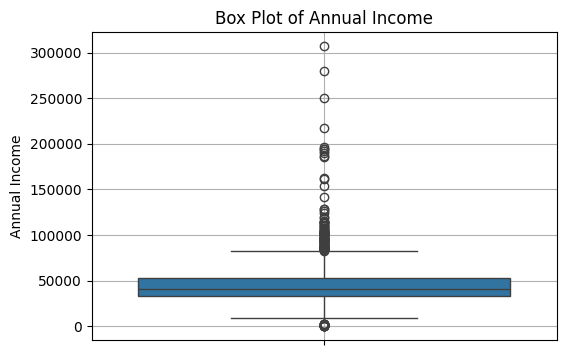

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(y='yearly_income', data=df)
plt.title("Box Plot of Annual Income")
plt.ylabel("Annual Income")
plt.grid(True)
plt.show()

I suspect that most high income earners have more than 5 cards. Below, I will find out if this is true.

In [3]:
# Identifying Top 25% and use Q3 value in my query in MySQL WorkBench
Q3 = df['yearly_income'].quantile(0.75)
Q3

np.float64(52698.5)

### Distribution of High Income Users(Top 25%) by Card Count

In [4]:
df = pd.read_csv("/Users/ams/Downloads/Final Queries/highincome_percent.csv")

In [6]:
df

,card_count,user_count,percentage_of_total
0,1,107,21.4
1,2,107,21.4
2,3,103,20.6
3,4,91,18.2
4,5,49,9.8
5,6,26,5.2
6,7,8,1.6
7,8,7,1.4
8,9,2,0.4


Text(0.5, 1.0, 'Distribution of High Income Users(Top 25%) by Card Count')

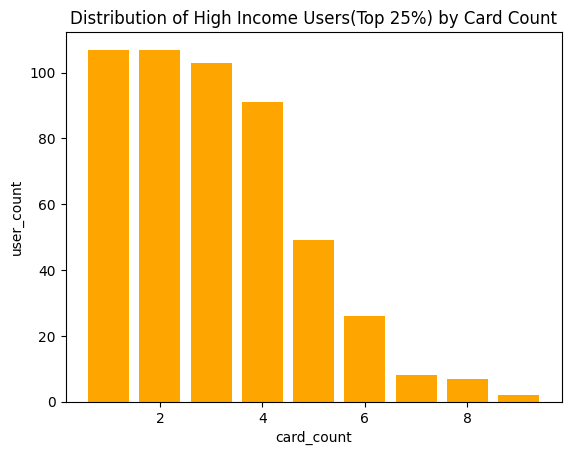

In [5]:
# Plot using bar chart
plt.bar(df['card_count'], df['user_count'], color='orange')

# Add labels and title
plt.xlabel('card_count')
plt.ylabel('user_count')
plt.title('Distribution of High Income Users(Top 25%) by Card Count')

Above chart shows 82% of high income users only have 1-4 cards. This rejects my hypothesis that most high income earners have more than 5 cards.

### Understanding Relationship Between Annual Income and Card Count

In [7]:
df = pd.read_csv("/Users/ams/Downloads/Final Queries/cardcount_income.csv")

In [8]:
df.head()

,user_id,yearly_income,card_count,cardcount_group
0,0,59613,4,1-4 cards
1,1,45360,3,1-4 cards
2,2,27447,5,5-7 cards
3,3,27943,4,1-4 cards
4,4,76431,5,5-7 cards


In [9]:
# Function to remove outliers in both Yearly Income and Card Count using IQR
def remove_outliers_iqr(df, columns):
    filtered_df = df.copy()
    for column in columns:
        Q1 = filtered_df[column].quantile(0.25)
        Q3 = filtered_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_df = filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]
    return filtered_df

# Remove outliers from 'yearly_income' and 'card_count' columns
cleaned_df = remove_outliers_iqr(df, ['yearly_income', 'card_count'])


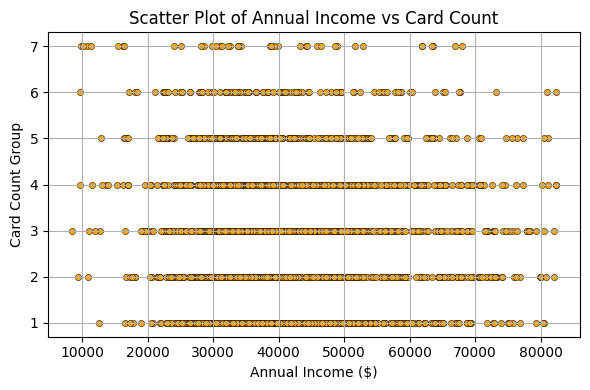

In [10]:
# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=cleaned_df, x='yearly_income', y='card_count', s=20, color='orange', edgecolor='k')

plt.title('Scatter Plot of Annual Income vs Card Count')
plt.xlabel('Annual Income ($)')
plt.ylabel('Card Count Group')
plt.grid(True)
plt.tight_layout()
plt.show()

#### I want to check using statistical techniques if users are likely to have more cards as their annual income increase.

In [11]:
# Compute Pearson correlation
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(cleaned_df["card_count"], cleaned_df["yearly_income"])

In [12]:
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.06597961761277663
P-value: 0.00437462987496274


#### Pearson Correlation Coefficient: -0.0659

This value is very close to 0, suggesting a very weak negative linear relationship between annual income and the number of credit cards.

As income increases, the number of cards slightly tends to decrease, but the relationship is so weak it's almost negligible.

#### P-value: 0.0043

The above result is statistically significant.